In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


In [2]:
df = pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

df.drop('isFlaggedFraud', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [3]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
4763622,334,PAYMENT,34194.40,C106616917,86241.00,52046.60,M685540612,0.00,0.00,0
5585045,394,CASH_OUT,175371.70,C1170877927,0.00,0.00,C1851620372,628883.55,804255.25,0
724431,37,CASH_IN,174259.04,C1895864089,18866193.76,19040452.80,C1600512192,2283274.64,2109015.60,0
754083,38,PAYMENT,1420.84,C884020814,0.00,0.00,M1103138742,0.00,0.00,0
6338561,691,CASH_IN,73565.13,C1167288575,239.00,73804.13,C158299779,2929038.63,2855473.50,0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [5]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
] 

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)


|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |           0 | 9.24455e+07 |
|  1 | oldbalanceOrg  |           0 |  5.9585e+07 |
|  2 | newbalanceOrig |           0 |  4.9585e+07 |
|  3 | oldbalanceDest |           0 | 3.56016e+08 |
|  4 | isFraud        |           0 |           1 |


In [6]:
# Downcast numerical columns with smaller dtype
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [7]:
# Check duplicate values
df.duplicated().sum()

0

In [8]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

In [9]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

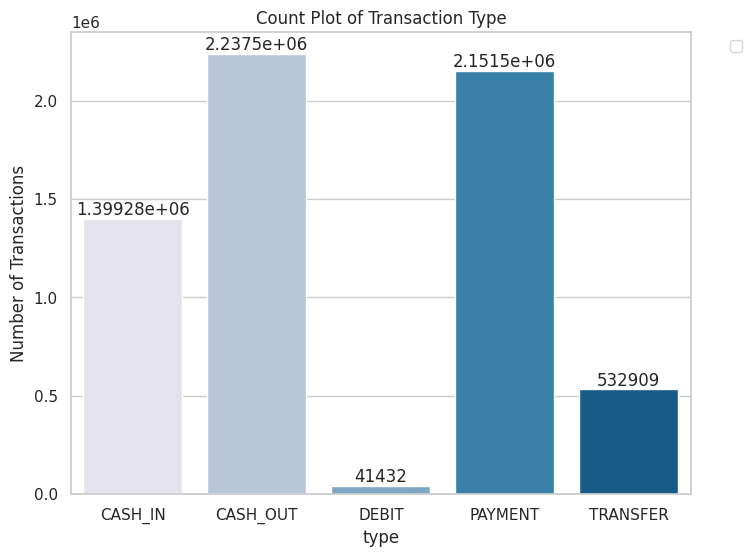

In [10]:
import warnings


# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

# Setting Seaborn style and Matplotlib figure size
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

# Creating the count plot
ax = sns.countplot(x='type', data=df, palette='PuBu')

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container)

# Adding title and labels
plt.title('Count Plot of Transaction Type')
plt.ylabel('Number of Transactions')

# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.show()


In [11]:


# Preprocess the data: Replace infinite values with NaN
df['amount'] = df['amount'].replace([np.inf, -np.inf], np.nan)

# Optionally, drop NaN values if necessary
df = df.dropna(subset=['amount'])


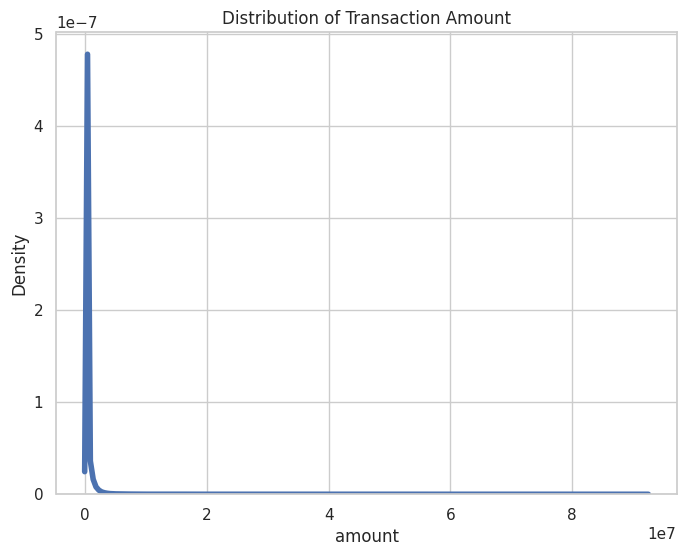

In [12]:

import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Preprocess the data: Replace infinite values with NaN
df['amount'] = df['amount'].replace([np.inf, -np.inf], np.nan)

# Optionally, drop NaN values if necessary
df = df.dropna(subset=['amount'])

# Setting Seaborn style and Matplotlib figure size
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

# Creating the KDE plot
sns.kdeplot(df['amount'], linewidth=4)

# Adding title
plt.title('Distribution of Transaction Amount')

# Displaying the plot
plt.show()

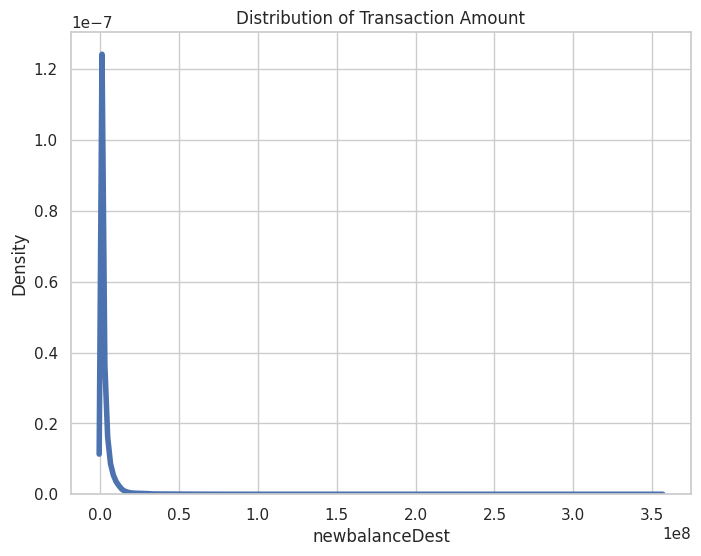

In [13]:

import warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Preprocess the data: Replace infinite values with NaN
df['newbalanceDest'] = df['newbalanceDest'].replace([np.inf, -np.inf], np.nan)

# Optionally, drop NaN values if necessary
df = df.dropna(subset=['newbalanceDest'])

# Setting Seaborn style and Matplotlib figure size
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

# Creating the KDE plot
sns.kdeplot(df['newbalanceDest'], linewidth=4)

# Adding title
plt.title('Distribution of Transaction Amount')

# Displaying the plot
plt.show()


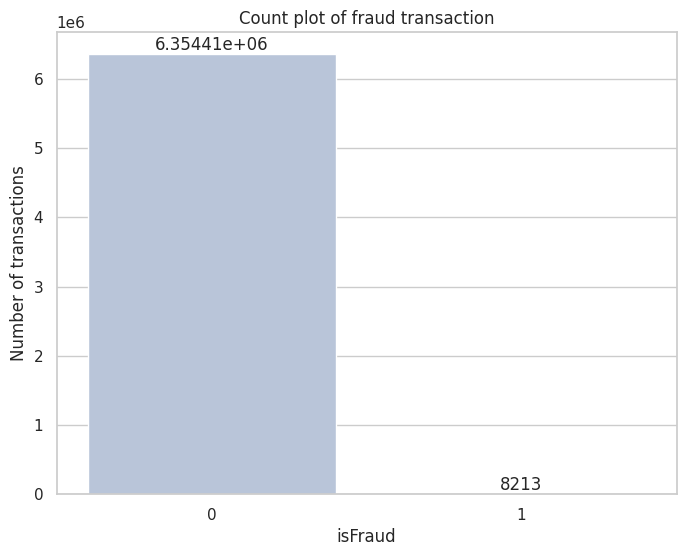

In [14]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

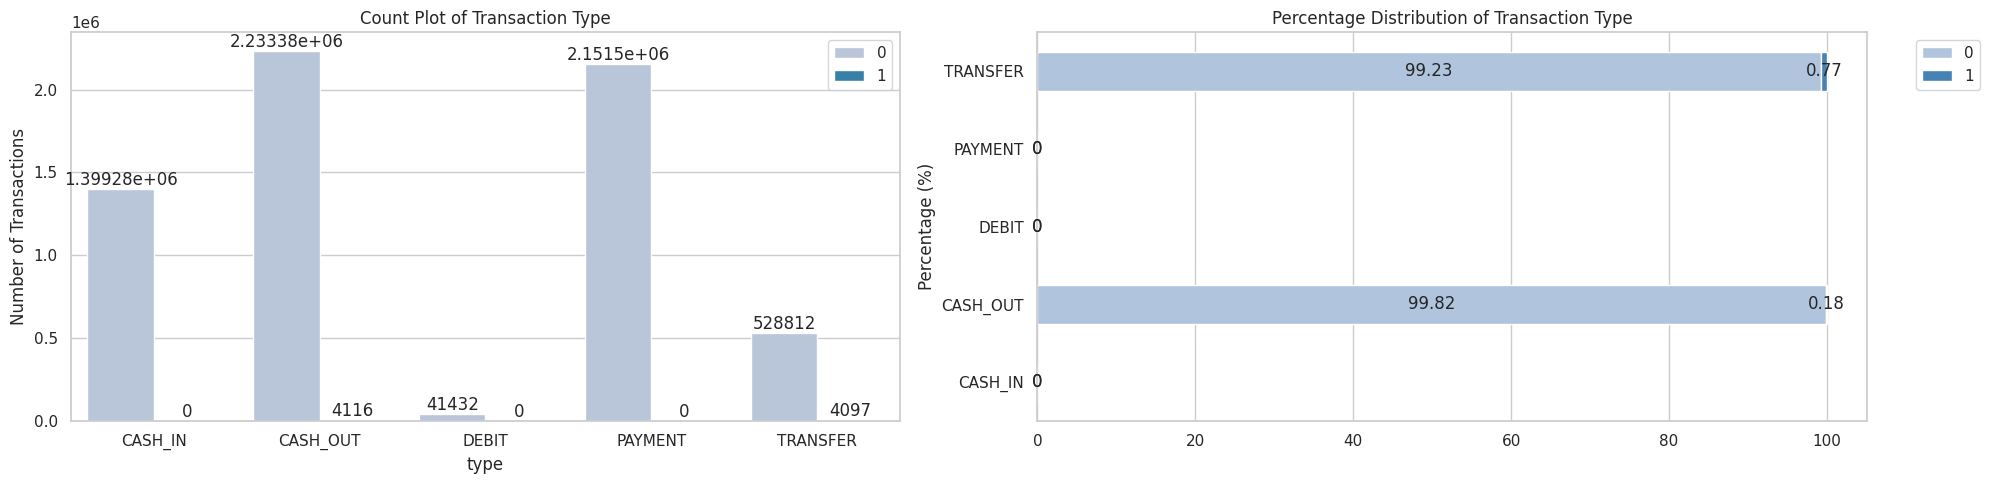

In [15]:


# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# First subplot: Count plot of transaction type with hue for isFraud
sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count Plot of Transaction Type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of Transactions')

# Second subplot: Stacked horizontal bar plot showing percentage distribution
# Explicitly specify observed=True to future-proof the code
df2 = df.groupby(['type', 'isFraud'], observed=True).size().unstack()
df2_percentage = df2.apply(lambda x: round(x / sum(x) * 100, 2), axis=1)
df2_percentage.plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Percentage Distribution of Transaction Type')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].set_ylabel('Percentage (%)')
ax[1].grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()


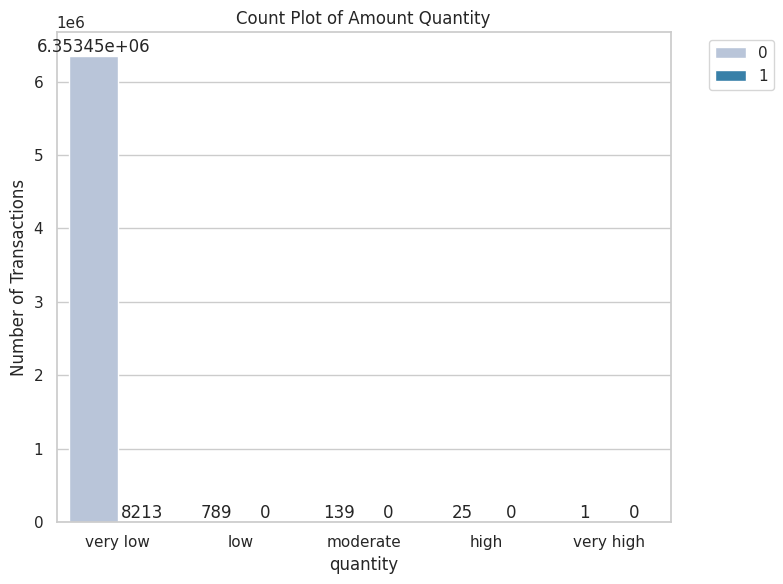

In [16]:

import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

# Assuming df is your DataFrame and 'amount' is a numerical column
df['quantity'] = pd.cut(df['amount'], bins=5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

# Create the count plot
ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container)

# Add titles and labels
plt.title('Count Plot of Amount Quantity')
plt.ylabel('Number of Transactions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


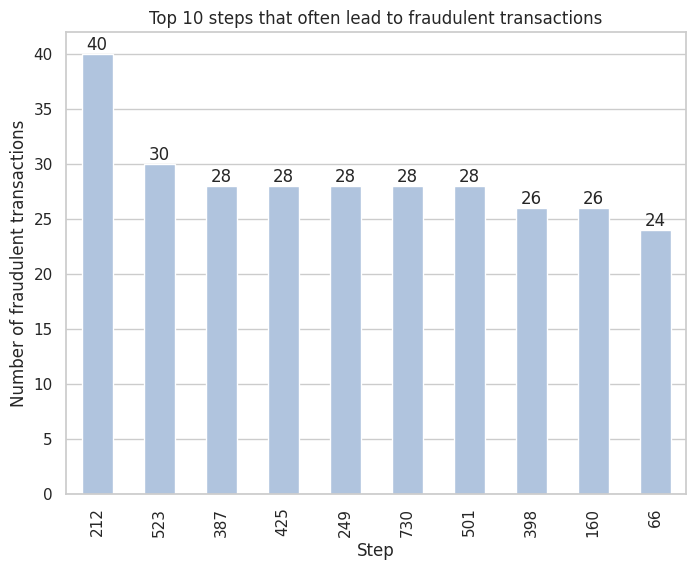

In [17]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

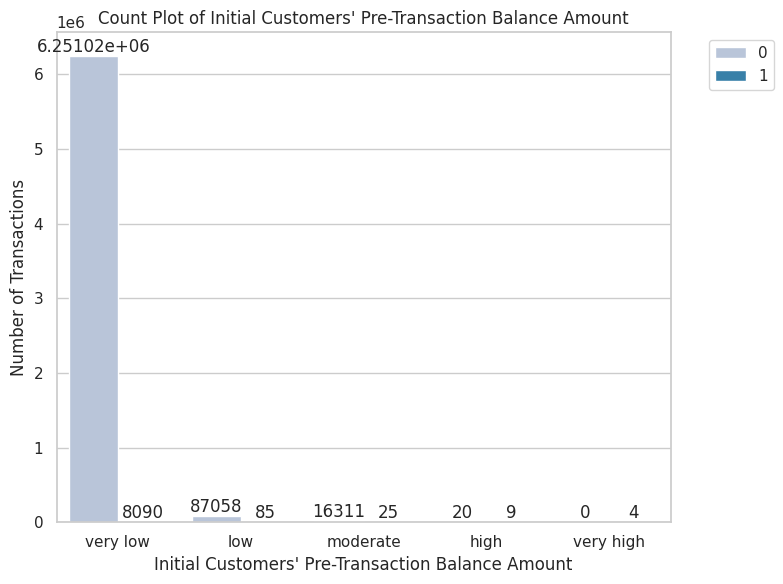

In [18]:

import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

# Assuming df is your DataFrame and 'oldbalanceOrg' is a numerical column
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], bins=5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

# Create the count plot
ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container)

# Add titles and labels
plt.title('Count Plot of Initial Customers\' Pre-Transaction Balance Amount')
plt.ylabel('Number of Transactions')
plt.xlabel('Initial Customers\' Pre-Transaction Balance Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


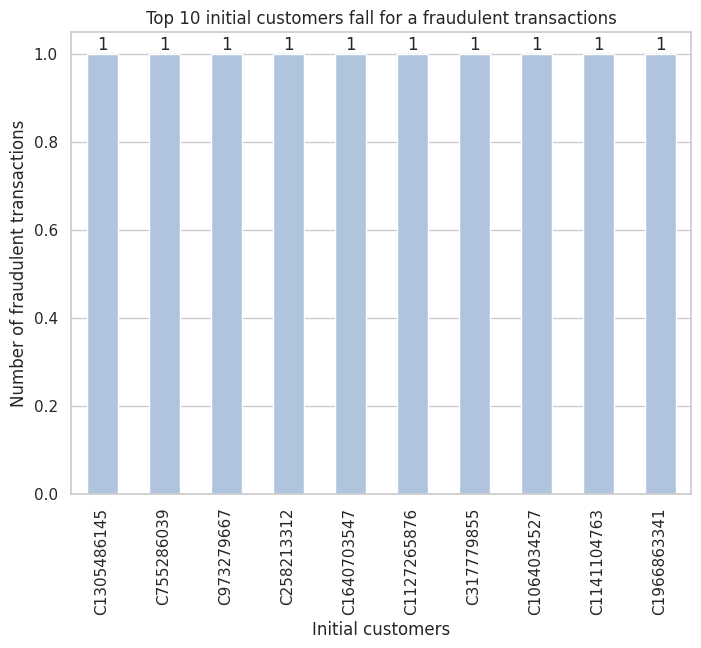

In [19]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

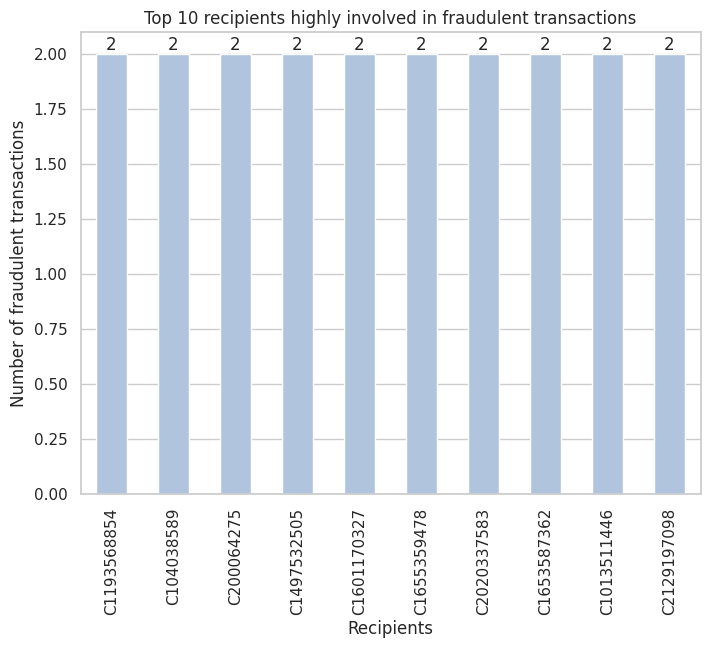

In [20]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

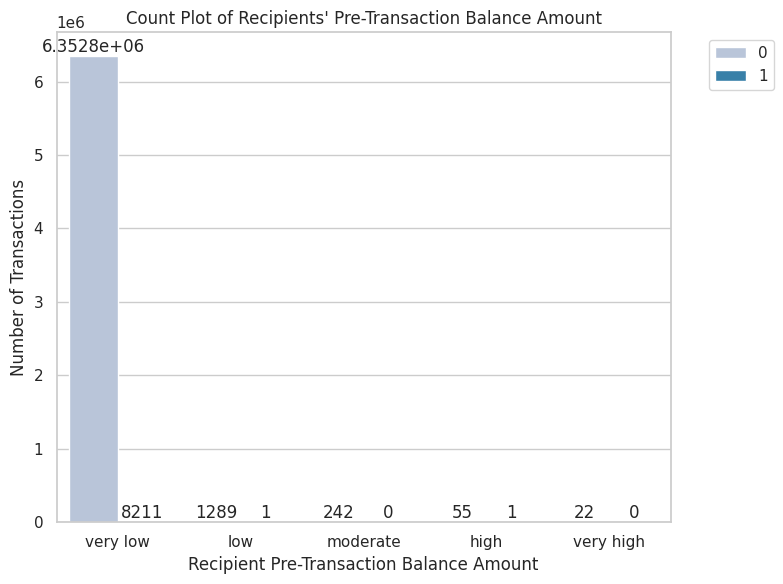

In [23]:


# Your plotting code
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], bins=5, labels=['very low', 'low', 'moderate', 'high', 'very high'])
ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container)

# Add titles and labels
plt.title('Count Plot of Recipients\' Pre-Transaction Balance Amount')
plt.ylabel('Number of Transactions')
plt.xlabel('Recipient Pre-Transaction Balance Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


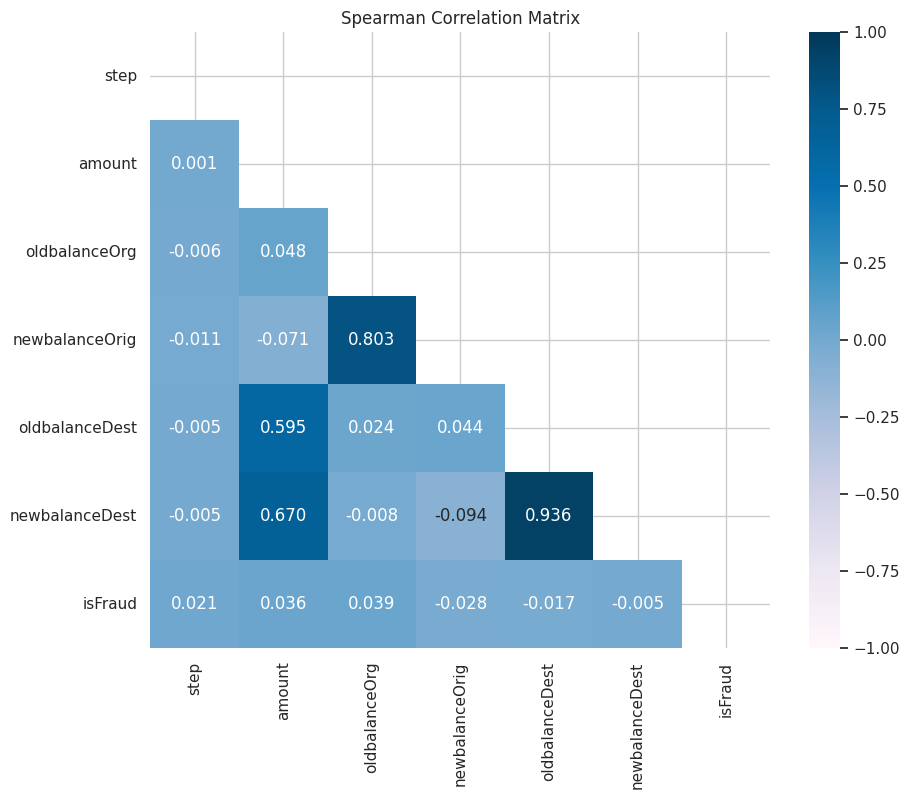

In [22]:


# Filter numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Drop columns with constant values or NaN columns
numeric_df = numeric_df.loc[:, numeric_df.apply(pd.Series.nunique) != 1]
numeric_df = numeric_df.dropna(axis=1, how='all')

# Compute Spearman correlation matrix
corr_matrix = numeric_df.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cbar=True, annot=True, mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), fmt='.3f', cmap='PuBu', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix')
plt.show()


In [24]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay


seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [26]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))
        
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        
        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
            
        print('\n')

In [27]:
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed)
              }

In [28]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 0.985 (0.003)
Mean precision score: 0.975 (0.006)
Mean recall score: 0.996 (0.002)
Mean f1 score: 0.985 (0.003)
Mean roc_auc score: 0.998 (0.000)


Logistic Regression:
Mean accuracy score: 0.848 (0.007)
Mean precision score: 0.843 (0.008)
Mean recall score: 0.856 (0.005)
Mean f1 score: 0.849 (0.006)
Mean roc_auc score: 0.927 (0.004)




Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.98      1.00      0.99   1239159
    Fraud [1]       1.00      0.05      0.09     33365

     accuracy                           0.98   1272524
    macro avg       0.99      0.52      0.54   1272524
 weighted avg       0.98      0.98      0.96   1272524
 



Text(0.5, 0, 'False Positive Rate')

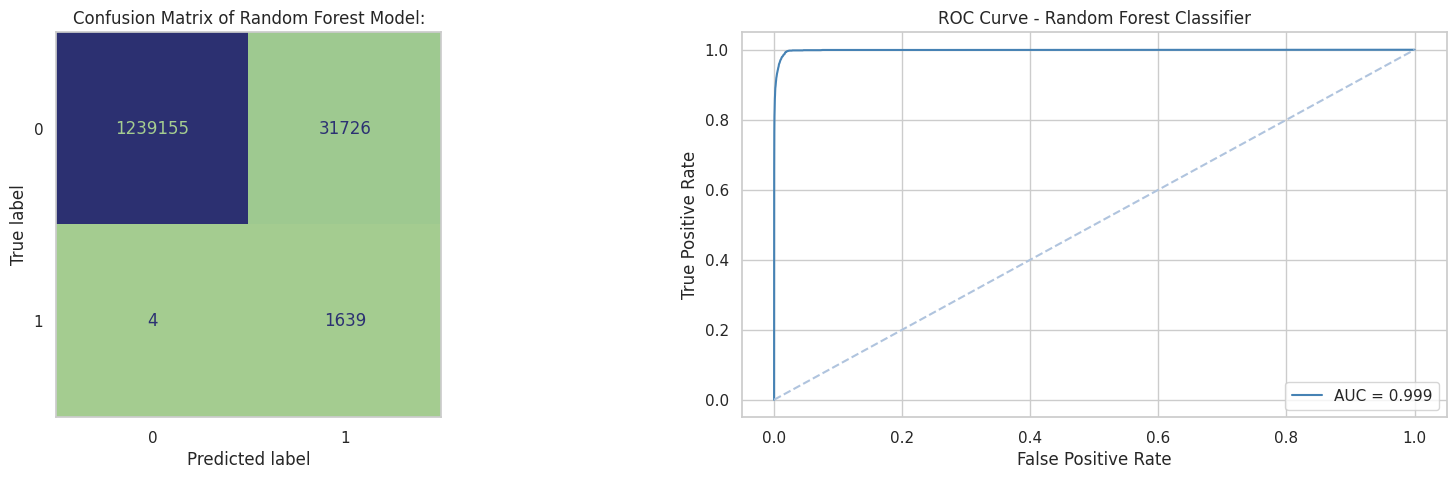

In [29]:
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
print('Random Forest Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)                       
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')